# Vallee et al 2017 Fig. 1

The supplementary material for Vallee et al 2017 provides a SAC macro for reproducing the figure. This data processing is what I want to follow for analysing PEGS so that I can recreate the Bolivia results from the Vallee and Juhel 2019 paper. 

I want to see if I can re-create the workflow using MSEED and obspy. Realistically the plan is to convert the MSEED using ObsPy to a SAC format and then process. TLDR is as follows: 

* This script successfully recreates the figure  


## Download data

In [3]:
from obspy import read
import shutil
from obspy.clients.fdsn import Client as CLFDSN
from obspy.clients.iris import Client as CLIRIS
from obspy import UTCDateTime
import os 
import matplotlib.pyplot as plt

# Clean out the directory: 
shutil.rmtree('./data')
os.mkdir('./data')
os.mkdir('./data/out')
os.mkdir('./data/raw')





clientFDSN = CLFDSN("IRIS")
clientIRIS = CLIRIS()




starttime = UTCDateTime("2011-3-11T03:00:00")
endtime   = UTCDateTime("2011-3-11T07:00:00")


stations = [['MA2',  'IU', '11'],
            ['BJT',  'IC', '00'],
            ['NE93', 'YP', '*'],
            ['INCN', 'IU', '10'],
            ['MDJ',  'IC', '00'],
            ['INU',  'G',  '00'],
            ['MAJO', 'IU', '10'],
            ['ULN',  'IU', '00'],
            ['XAN',  'IC', '00'],
           ]

chan = "BHZ"


for i in range(len(stations)):
    sta = stations[i][0]  # station code
    net = stations[i][1]  # network of the station
    loc = stations[i][2]
    outdir = f'./data/'
    prefix = f'{net}.{sta}.{loc}.{chan}'

    respfname = f'{outdir}/RESP.{prefix}'
    XMLfname = f'{outdir}/RE{prefix}'

    sacfname  = f'{outdir}/raw/{prefix}.sac'
    
    #st = clientFDSN.get_waveforms(network=net, station=sta, channel=chan, location=loc, starttime=starttime, endtime=endtime)
    resp = clientIRIS.resp(network=net, station=sta, location=loc, channel=chan, 
                       starttime=starttime, endtime=endtime, filename=respfname)
   
    # Write sac file
    #print(f'Written ', respfname)
    #st.write(sacfname, format='XML') 
    #print(f'        ', sacfname)
print('DONE!')


         ./data//raw/IU.MA2.11.BHZ.sac
         ./data//raw/IC.BJT.00.BHZ.sac
         ./data//raw/YP.NE93.*.BHZ.sac
         ./data//raw/IU.INCN.10.BHZ.sac
         ./data//raw/IC.MDJ.00.BHZ.sac
         ./data//raw/G.INU.00.BHZ.sac
         ./data//raw/IU.MAJO.10.BHZ.sac
         ./data//raw/IU.ULN.00.BHZ.sac
         ./data//raw/IC.XAN.00.BHZ.sac
DONE!


# Create the SAC macro: 



In [2]:
# Arrival time picks 
T0 = {'MA2' :292.3,
      'BJT' :276.4,
      'NE93':237.43,
      'INCN':177.7,
      'MDJ' :163.81,
      'INU' :77.77,
      'MAJO':57.95,
      'ULN' :344,
      'XAN' :343.65,
     }



In [3]:
import os 
import fileinput
from datetime import datetime

macro_fname = './data/macro_Juhel2017'




## Run the macro! 

Note that you will need to stop this manually because you cant put in the sac command properly:

In [4]:
! cd data && $SACHOME/bin/sac macro_Juhel2017
! q

 SEISMIC ANALYSIS CODE [09/01/2020 (Version 102.0)]
 Copyright 1995 Regents of the University of California

./raw/IU.MA2.11.BHZ.sac
./raw/IC.BJT.00.BHZ.sac
./raw/YP.NE93.*.BHZ.sac
./raw/IU.INCN.10.BHZ.sac
./raw/IC.MDJ.00.BHZ.sac
./raw/G.INU.00.BHZ.sac
./raw/IU.MAJO.10.BHZ.sac
./raw/IU.ULN.00.BHZ.sac
./raw/IC.XAN.00.BHZ.sac
./out/MA2_proc.sac
./out/BJT_proc.sac
./out/NE93_proc.sac
./out/INCN_proc.sac
./out/MDJ_proc.sac
./out/INU_proc.sac
./out/MAJO_proc.sac
./out/ULN_proc.sac
./out/XAN_proc.sac
 Extracting evresp response for MA2, BHZ...
 Station (MA2     ), Channel (BHZ     )
 Units: nm/s^2  (nanometers / second^2)
 Extracting evresp response for BJT, BHZ...
 Station (BJT     ), Channel (BHZ     )
 Units: nm/s^2  (nanometers / second^2)
 Extracting evresp response for NE93, BHZ...
 Station (NE93    ), Channel (BHZ     )
 Units: nm/s^2  (nanometers / second^2)
 Extracting evresp response for INCN, BHZ...
 Station (INCN    ), Channel (BHZ     )
 Units: nm/s^2  (nanometers / second^2)
 E

## Plotting data:

Once I have run the macro using SAC to get the processed data we can create the plot 




['MAJO', 'INU', 'MDJ', 'INCN', 'NE93', 'BJT', 'MA2', 'XAN', 'ULN']

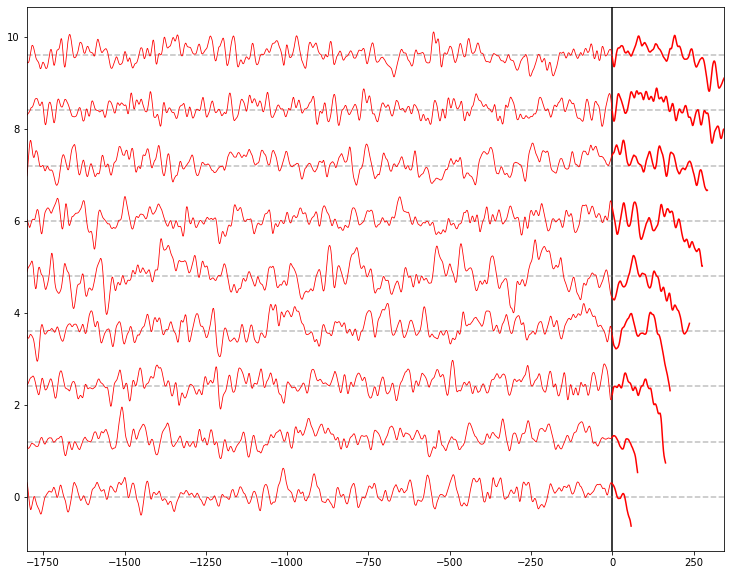

In [6]:
stations = ['MAJO', 'INU', 'MDJ', 'INCN','NE93', 'BJT', 'MA2','XAN', 'ULN' ]
# ignoting 

# Load processed data (SAC files)
from obspy.core.stream import Stream
import sys
import numpy as np 
sys.path.append('../')
from wetools import obspy_gen_mpl, normalise



st = Stream()
for i in range(len(stations)): 
    stn_name = stations[i]
    st += read(f'./data/out/{stn_name}_proc.sac')

# Timings: 
secs_before = 1800
secs_after  = 500
event_time  = UTCDateTime("2011-3-11T05:46: 23")

st = st.slice(starttime=event_time - secs_before , endtime=event_time + secs_after)



fig, ax = plt.subplots(figsize=(12.5, 10))

ax.axvline(0, linestyle='-', color='k')
for i in range(len(stations)):
    tr = st.select(station=stations[i])[0]
    t,y = obspy_gen_mpl(tr)
    
    t = t - secs_before
    
    # Cutoff for any amplitude above 3 nm/s^2 
    #cutamp = 1.5
    
    #indx_t0 = np.where(t>=0)[0][0]
    #cutoff = indx_t0 + np.where(np.abs(y[indx_t0:])>cutamp)[0][0]
    
    #t = t[:cutoff]
    #y = y[:cutoff]
    
    #if np.max(y)>cutamp: 
    #    print(stations[i])
    cutamp = 0.8
    ax.axhline(i*cutamp*1.5, color='grey', linestyle='--', alpha=0.5)
    
    
    ax.plot(t[t<0], y[t<0] + i*cutamp*1.5, 'r', linewidth=0.8)
    ax.plot(t[t>0], y[t>0] + i*cutamp*1.5, 'r', linewidth=1.5)


ax.set_xlim([-1800, 345])

stations